# Plot Moran process data

In [1]:
import numpy as np
import pandas as pd
import pdb 
import matplotlib.pyplot as plt
import mitonetworks.det as mt
import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them
mt.reset_plots()
%matplotlib inline

In [3]:
nrowskip = 5 # lines of metadata in output
data_dir = '.'
output_file_form = 'output.txt'
nrep_per_job = 10000 # number of repeats in each job

In [4]:
data = pd.read_csv(data_dir+'/'+output_file_form, skiprows=nrowskip, delimiter=',')

In [5]:
data.head()

,t,rep,m,h
0,0.0,0,4000,0.4000
1,10.0,0,4018,0.4018
2,20.0,0,3974,0.3974
3,30.0,0,4047,0.4047
4,40.0,0,4000,0.4000


In [6]:
g = data[['t','h']].groupby('t')

In [7]:
hm_t = g.mean()
hv_t = g.var(ddof=1)

In [8]:
hm_t.columns = ['meanh']
hv_t.columns = ['varh']

In [9]:
def vh_ansatz(t, h0, mu, n, fs):
    return mu*t*fs*h0*(1.-h0)/n
def vh_ansatz_indep_fs(t, h0, mu, n):
    return 2*mu*t*h0*(1.-h0)/n

In [10]:
h0 = 0.4
mu = 0.023
n = 10000
vh_an = vh_ansatz_indep_fs(hv_t.index, h0, mu, n)

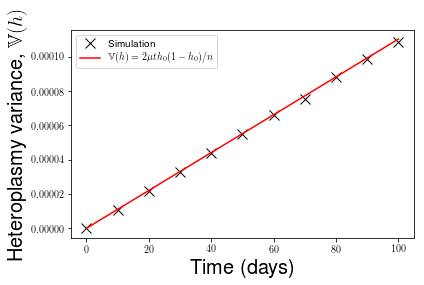

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(hv_t.index,hv_t['varh'],'kx',label='Simulation')
ax.plot(hv_t.index, vh_an,'-r',label='$\mathbb{V}(h)= 2 \mu t h_0 (1-h_0)/n$')
ax.legend()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Heteroplasmy variance, $\mathbb{V}(h)$')
plt.tight_layout()
#plt.savefig('shielded_moran.png')
plt.savefig('shielded_moran.svg')